In [44]:
import skimage
import numpy as np
from PIL import Image

In [50]:
method_depth = skimage.io.imread("../../output/20240929/val_multillum_train2_relight/vae/3.0/depth/1e-4/chk299/inversion500/lightning_logs/version_0/crop_image/14n_copyroom10-dir_0_mip2_14n_copyroom10-dir_0_mip2.png")

In [51]:
method_bothbae = skimage.io.imread("../../output/20240929/val_multillum_train2_relight/vae/3.0/both_bae/1e-4/chk349/inversion500/lightning_logs/version_0/crop_image/14n_copyroom10-dir_0_mip2_14n_copyroom10-dir_0_mip2.png")

In [52]:
# compute differnet. show the pixel difference as white 
diff = np.abs(skimage.img_as_float(method_depth) - skimage.img_as_float(method_bothbae))
diff[diff >= 2.0 / 255.0] = 1.0

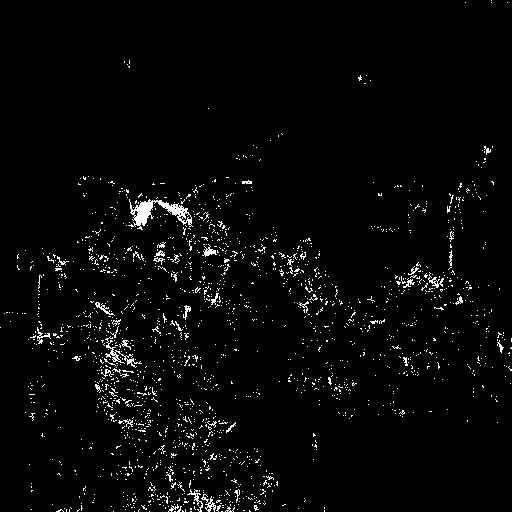

In [53]:
# max pull ing for each pixel in channel dimesion
diff1 = np.max(diff, axis=2)
# convert back to uint8 and display
diff = skimage.img_as_ubyte(diff1)
img = Image.fromarray(diff)
display(img)

In [54]:
depth_img = skimage.img_as_float(method_depth)
bothbae_img = skimage.img_as_float(method_bothbae)

In [57]:
cat_image = np.concatenate([depth_img, bothbae_img, np.concatenate([diff1[...,None],diff1[...,None],diff1[...,None]], axis=-1) ], axis=1)

In [58]:
cat_image = skimage.img_as_ubyte(np.clip(cat_image,0,1))

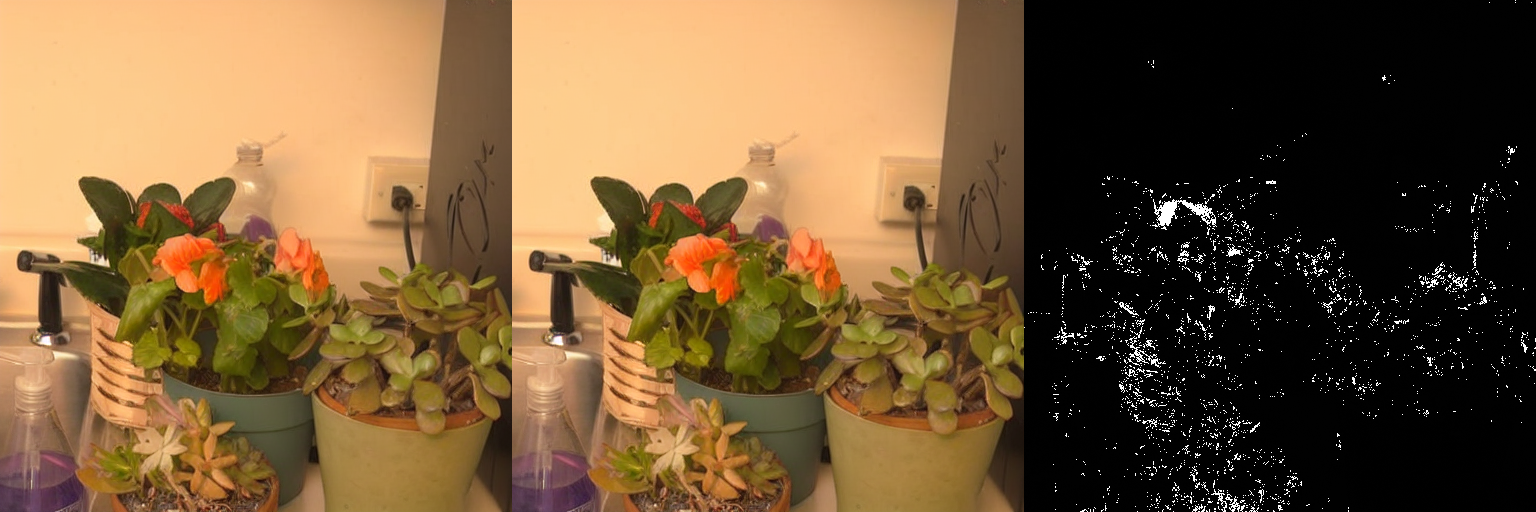

In [59]:
img = Image.fromarray(cat_image)
display(img)